### Colab Activity 21.2: Basic Weight Update

**Expected Time = 60 minutes**


This activity focuses on updating the weights to improve the performance of the network.  To demonstrate this update process, a basic loss function together with its derivative are implements to update the randomly initialized weights.  You begin with a very basic dataset meant to replicate the logic gate problems surrounding the early ANN models.

#### Index

- [Problem 1](#-Problem-1)
- [Problem 2](#-Problem-2)
- [Problem 3](#-Problem-3)
- [Problem 4](#-Problem-4)
- [Problem 5](#-Problem-5)
- [Problem 6](#-Problem-6)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#set up our data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 1])

In [3]:
#subset no and yes
nos = X[y == 0]
yesses = X[y == 1]

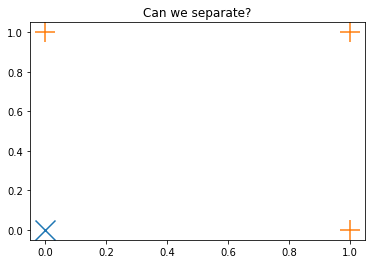

In [6]:
#plot our examples
plt.scatter(nos[:, 0], nos[:, 1], marker = 'x', s = 400)
plt.scatter(yesses[:, 0], yesses[:, 1], marker = '+', s = 400)
plt.title("Can we separate?");

[Back to top](#-Index)

### Problem 1

#### Preparing the Data



To prepare the data for modeling, you will need to add a bias term.  

In the code cell below, prepend a column of `-1`'s to the array `X` and save the new array as `Xt` below.

In [ ]:

b = np.ones((X.shape[0], 1)) * -1
Xt = np.concatenate((b, X), axis = 1)


### ANSWER CHECK
print(Xt)

[[-1.  0.  0.]
 [-1.  0.  1.]
 [-1.  1.  0.]
 [-1.  1.  1.]]


[Back to top](#-Index)

### Problem 2

#### Initializing the weights



Below, an array of weights `w` is given for both the bias term and the two features. Use matrix multiplication to apply these weights to `Xt`.  Assign the result to the variable `weighted_sum` below.

In [9]:
#weight array
w = np.array([-0.05, -0.02, 0.02])

In [ ]:

weighted_sum = Xt@w


### ANSWER CHECK
print(weighted_sum)

[0.05 0.07 0.03 0.05]


[Back to top](#-Index)

### Problem 3

#### Activation Function



Now, use the basic threshold activation function `where` on `weighted_sum` to output 1 if the input is greater than 0, otherwise label it 0.  Assign the values to the variable `predictions` below. 

In [ ]:

predictions = np.where(weighted_sum > 0, 1, 0)


### ANSWER CHECK
print(predictions)

[1 1 1 1]


[Back to top](#-Index)

### Problem 4

#### Weight Update



Next, you want to update the initial weights using the following formula for gradient descent with learning rate $\alpha$:

$$w_{i + 1} = w_{i} + \alpha(y - \hat{y})x$$

In the code cell below, use this formula to update the initial weights with $\alpha = 0.1$. Assign the results to `w2` below.

In [ ]:

w2 = w + 0.1*(y - predictions)@Xt


### ANSWER CHECK
print(w2)

[ 0.05 -0.02  0.02]


[Back to top](#-Index)

### Problem 5

#### Putting it together



In the code cell below, use a `for` loop to define a model that performs ten iterations of the weight updates.  What is the accuracy of the model after 10 iterations?  Assign this result to `ans5` below.

In [ ]:

w = np.array([-0.05, -0.02, 0.02])
for i in range(10):
    #perform our estimation
    predictions = np.where(Xt@w > 0, 1, 0)
    #print(preds)
    #weight update
    w = w + 0.1*(y - predictions)@Xt
ans5 = sum(predictions == y)/len(y)


### ANSWER CHECK
print(ans5)
print(w)
print(predictions)

1.0
[0.05 0.18 0.22]
[0 1 1 1]


[Back to top](#-Index)

### Problem 6

#### A Larger Example



Below, a second example is constructed using a synthetic dataset.  Your goal is to use the algorithm for updating the weights.  Determie the accuracy and assign as `ans6` below.

In [18]:
from sklearn.datasets import make_blobs

In [19]:
X, y = make_blobs(centers = 2, center_box=(-3, 3), random_state = 22)

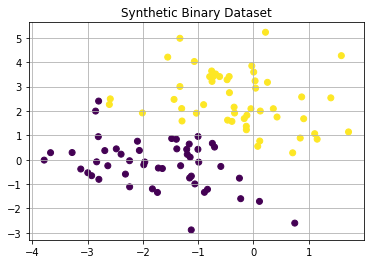

In [20]:
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.grid()
plt.title('Synthetic Binary Dataset');

In [ ]:

w = np.array([0, 0, 0])
biases = np.ones((X.shape[0], 1))
X2 = np.concatenate((biases, X), axis = 1)
for i in range(100):
    #perform our estimation
    predictions = np.where(X2@w > 0, 1, 0)
    #print(preds)
    #weight update
    w = w + 0.1*(y - predictions)@X2
ans6 = sum(predictions == y)/len(y)


### ANSWER CHECK
print(w)
print(ans6)

[-1.4         7.85617133  9.69891443]
1.0
